<a href="https://colab.research.google.com/github/athirakmenon/FINAL-PROJECT/blob/main/K_meansipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING NECESSARY** **LIBRARIES**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

**READ THE CSV** **DATA**

In [2]:
data = '/content/Neutronstars.csv'
n_data= pd.read_csv(data, sep=';', skiprows=3,skipfooter=6, na_values=['*'])

n_data

,#,NAME,PSRJ,P0,P1,F0,F1,DM,RM,W50,S1400,BINARY,DIST,AGE,Unnamed: 14
0,NaN,NaN,NaN,(s),NaN,(Hz),(s^-2),(cm^-3pc),(radm^-2),(ms),(mJy),(type),(kpc),(Yr),NaN
1,1.0,J0002+6216,J0002+6216,0.115364,5.970000e-15,8.668248,-4.484e-13,218.60,NaN,NaN,0.02,NaN,6.357,3.06e+05,NaN
2,2.0,J0006+1834,J0006+1834,0.693748,2.100000e-15,1.441446,-4.357e-15,11.40,-20.00,82.000,NaN,NaN,0.860,5.24e+06,NaN
3,3.0,J0007+7303,J0007+7303,0.315873,3.600000e-13,3.165827,-3.612e-12,NaN,NaN,NaN,NaN,NaN,1.400,1.39e+04,NaN
4,4.0,J0011+08,J0011+08,2.552870,NaN,0.391716,NaN,24.90,NaN,28.000,NaN,NaN,5.399,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,3530.0,B2351+61,J2354+6155,0.944784,1.630000e-14,1.058443,-1.822e-14,94.66,-75.90,10.400,5.00,NaN,2.400,9.20e+05,NaN
3531,3531.0,J2354-22,J2354-22,0.557996,NaN,1.792128,NaN,9.90,NaN,9.000,NaN,NaN,1.108,NaN,NaN
3532,3532.0,J2355+0051,J2355+0051,0.003719,3.220000e-21,268.890043,-2.330e-16,11.15,-0.10,NaN,0.16,ELL1,0.958,1.83e+10,NaN
3533,3533.0,J2355+1523,J2355+1523,1.094396,4.190000e-16,0.913746,-3.500e-16,26.00,NaN,NaN,NaN,NaN,3.444,4.14e+07,NaN


# **DATA** **PREPROCESSING**

In [4]:
#Checking for null values
n_data.isnull().sum()

#                 1
NAME              1
PSRJ              1
P0               57
P1              867
F0               57
F1              866
DM              119
RM             1996
W50             914
S1400          1095
BINARY         3130
DIST             75
AGE             926
Unnamed: 14    3535
dtype: int64

In [5]:
#Dropping columns ='#','Unnamed:14'
new_data =n_data.iloc[:, 1:-1].drop(index=0).reset_index(drop=True)
new_data

,NAME,PSRJ,P0,P1,F0,F1,DM,RM,W50,S1400,BINARY,DIST,AGE
0,J0002+6216,J0002+6216,0.115364,5.970000e-15,8.668248,-4.484e-13,218.60,NaN,NaN,0.02,NaN,6.357,3.06e+05
1,J0006+1834,J0006+1834,0.693748,2.100000e-15,1.441446,-4.357e-15,11.40,-20.00,82.000,NaN,NaN,0.860,5.24e+06
2,J0007+7303,J0007+7303,0.315873,3.600000e-13,3.165827,-3.612e-12,NaN,NaN,NaN,NaN,NaN,1.400,1.39e+04
3,J0011+08,J0011+08,2.552870,NaN,0.391716,NaN,24.90,NaN,28.000,NaN,NaN,5.399,NaN
4,J0012+5431,J0012+5431,3.025301,1.280000e-16,0.330546,-1.400e-17,131.30,NaN,NaN,NaN,NaN,5.425,3.74e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,B2351+61,J2354+6155,0.944784,1.630000e-14,1.058443,-1.822e-14,94.66,-75.90,10.400,5.00,NaN,2.400,9.20e+05
3530,J2354-22,J2354-22,0.557996,NaN,1.792128,NaN,9.90,NaN,9.000,NaN,NaN,1.108,NaN
3531,J2355+0051,J2355+0051,0.003719,3.220000e-21,268.890043,-2.330e-16,11.15,-0.10,NaN,0.16,ELL1,0.958,1.83e+10
3532,J2355+1523,J2355+1523,1.094396,4.190000e-16,0.913746,-3.500e-16,26.00,NaN,NaN,NaN,NaN,3.444,4.14e+07


In [6]:
#checking data types
print(new_data.dtypes)

NAME       object
PSRJ       object
P0         object
P1        float64
F0         object
F1         object
DM         object
RM         object
W50        object
S1400      object
BINARY     object
DIST       object
AGE        object
dtype: object


In [7]:
#Coverting relevent column to numeric
columns_to_convert = ['P0', 'F0', 'F1', 'DM', 'RM', 'W50', 'S1400', 'DIST', \
                      'AGE']
for col in columns_to_convert:
    new_data[col] = pd.to_numeric(new_data[col], errors='coerce')

In [8]:
#checking converted dtypes
print(new_data.dtypes)

NAME       object
PSRJ       object
P0        float64
P1        float64
F0        float64
F1        float64
DM        float64
RM        float64
W50       float64
S1400     float64
BINARY     object
DIST      float64
AGE       float64
dtype: object


In [ ]:
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P0,3477.0,8.379762e-01,1.256985e+00,1.396000e-03,1.824950e-01,4.996950e-01,1.023504e+00,2.353538e+01
P1,2668.0,3.941206e-13,1.101897e-11,-2.760000e-15,8.280000e-17,1.260000e-15,6.227500e-15,5.490000e-10
F0,3477.0,4.537562e+01,1.106748e+02,4.248900e-02,9.770360e-01,2.001221e+00,5.479608e+00,7.163556e+02
F1,2668.0,-7.852899e-13,9.781081e-12,-3.775000e-10,-1.902250e-14,-2.246000e-15,-4.662000e-16,4.660000e-14
DM,3415.0,2.070177e+02,2.075401e+02,2.380000e+00,5.248500e+01,1.347000e+02,2.935700e+02,1.778000e+03
RM,1538.0,-8.770117e+00,1.770387e+03,-6.608000e+04,-4.200000e+01,1.000000e+01,9.730000e+01,1.325300e+04
W50,2620.0,2.512631e+01,3.852572e+01,3.500000e-02,6.900000e+00,1.400000e+01,2.900000e+01,6.599000e+02
S1400,2439.0,2.077175e+00,2.316205e+01,0.000000e+00,1.300000e-01,3.200000e-01,9.000000e-01,1.050000e+03
DIST,3459.0,6.074056e+00,6.729197e+00,9.300000e-02,2.371000e+00,4.500000e+00,7.215000e+00,6.026100e+01
AGE,2608.0,1.749508e+09,3.246446e+10,2.180000e+02,1.600000e+06,9.190000e+06,8.487500e+07,1.640000e+12


             P0        P1        F0        F1        DM        RM       W50  \
P0     1.000000  0.164391 -0.266211  0.040724  0.018441 -0.083489  0.383010   
P1     0.164391  1.000000 -0.013614 -0.025836  0.128995 -0.321677  0.026064   
F0    -0.266211 -0.013614  1.000000  0.014654 -0.226211  0.008602 -0.178729   
F1     0.040724 -0.025836  0.014654  1.000000 -0.030507  0.001051  0.022618   
DM     0.018441  0.128995 -0.226211 -0.030507  1.000000 -0.150880  0.220996   
RM    -0.083489 -0.321677  0.008602  0.001051 -0.150880  1.000000  0.151434   
W50    0.383010  0.026064 -0.178729  0.022618  0.220996  0.151434  1.000000   
S1400 -0.021943  0.000776 -0.016038 -0.034377 -0.038166 -0.017316 -0.018099   
DIST   0.015208  0.031163 -0.098531 -0.113694  0.233481 -0.006146  0.075899   
AGE   -0.034781 -0.001950  0.082455  0.004377 -0.026857  0.003616 -0.025753   

          S1400      DIST       AGE  
P0    -0.021943  0.015208 -0.034781  
P1     0.000776  0.031163 -0.001950  
F0    -0.016038 

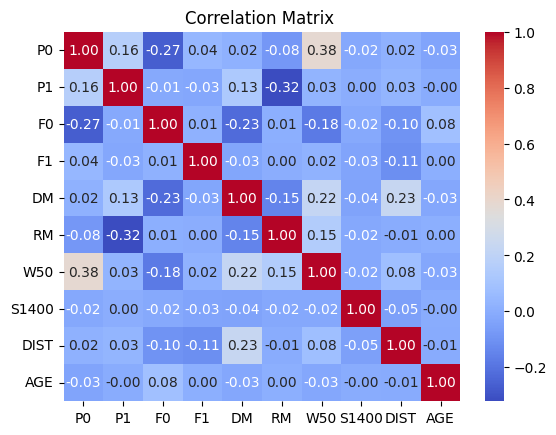

In [9]:

# Select relevant columns for correlation
cordata_= new_data[[ 'P0', 'P1','F0', 'F1','DM', 'RM', 'W50', 'S1400', 'DIST', 'AGE']]

# Compute the correlation matrix
corr_matrix = cordata_.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot the correlation matrix

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix ')
plt.show()

checking for conditions



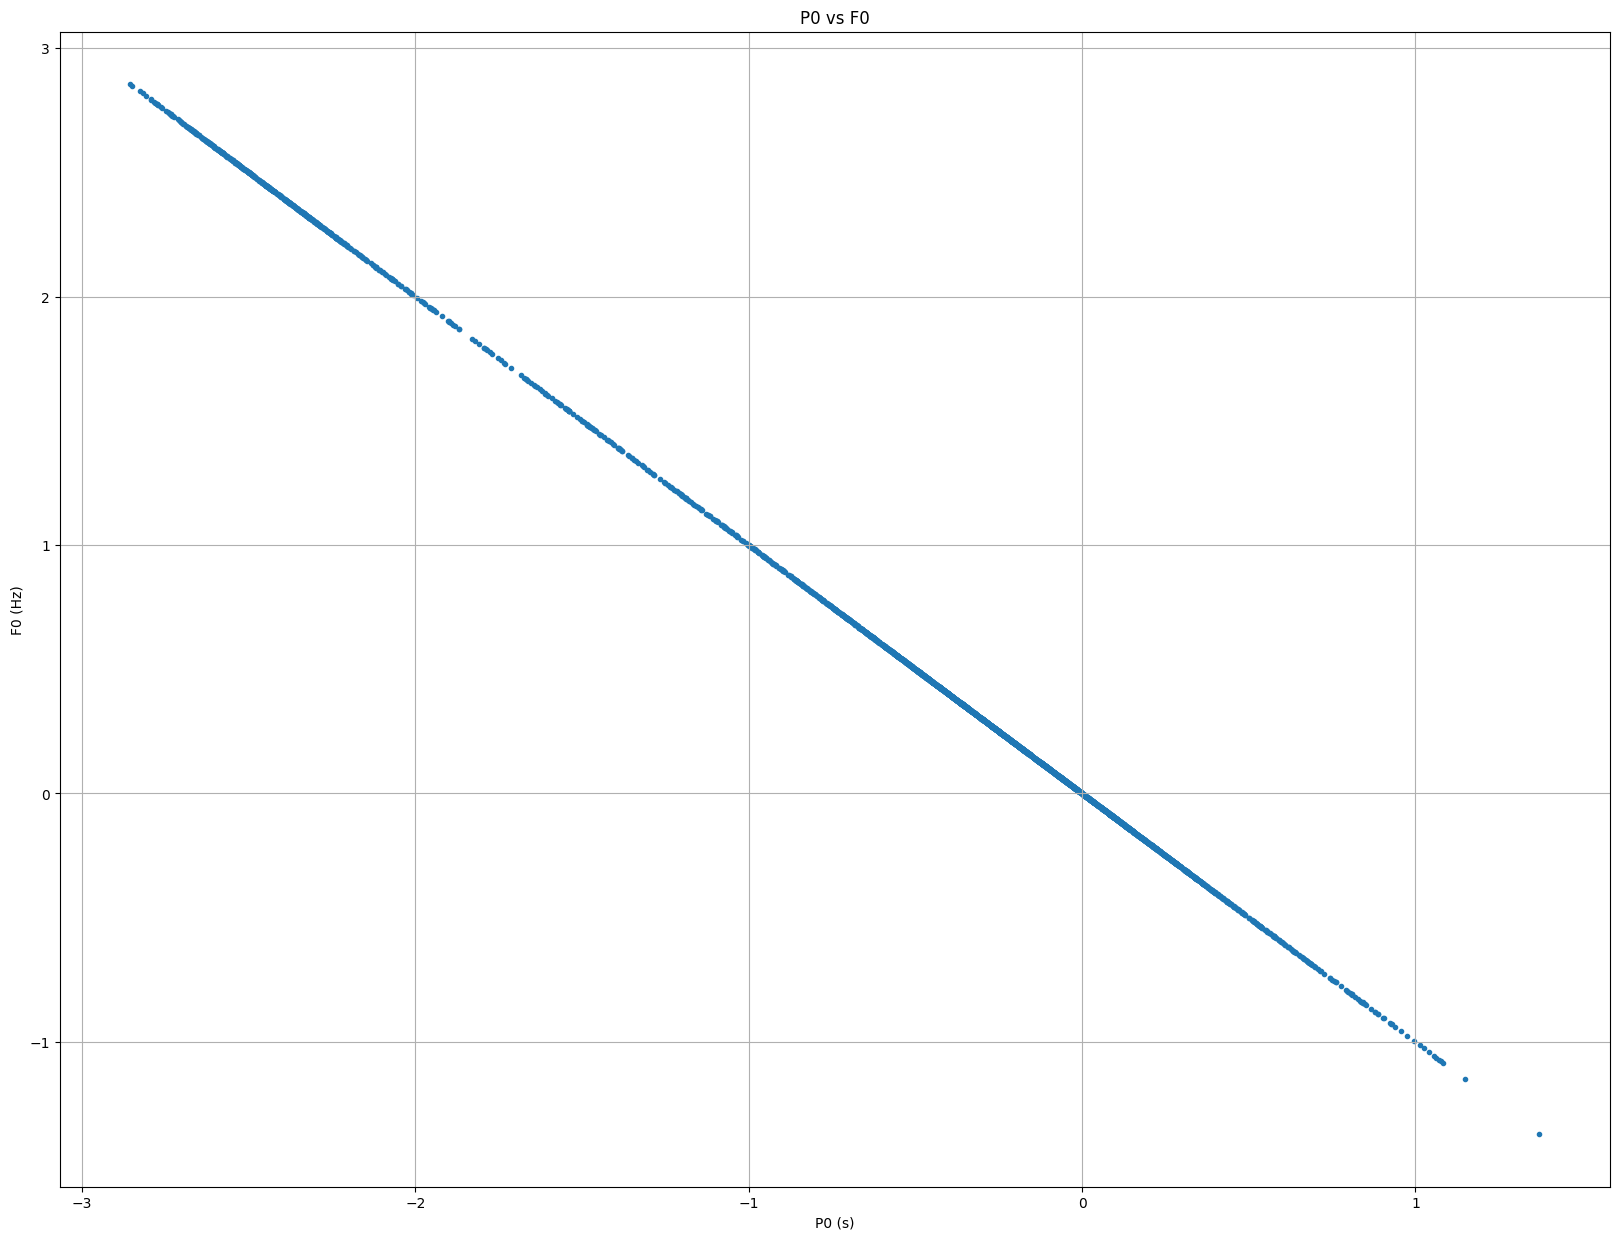

In [10]:
plt.figure(figsize=(20, 15))
plt.scatter(np.log10(new_data['P0']),np.log10( new_data['F0']), marker='.')
plt.title('P0 vs F0')
plt.xlabel('P0 (s)')
plt.ylabel('F0 (Hz)')
plt.grid(True)
plt.show()

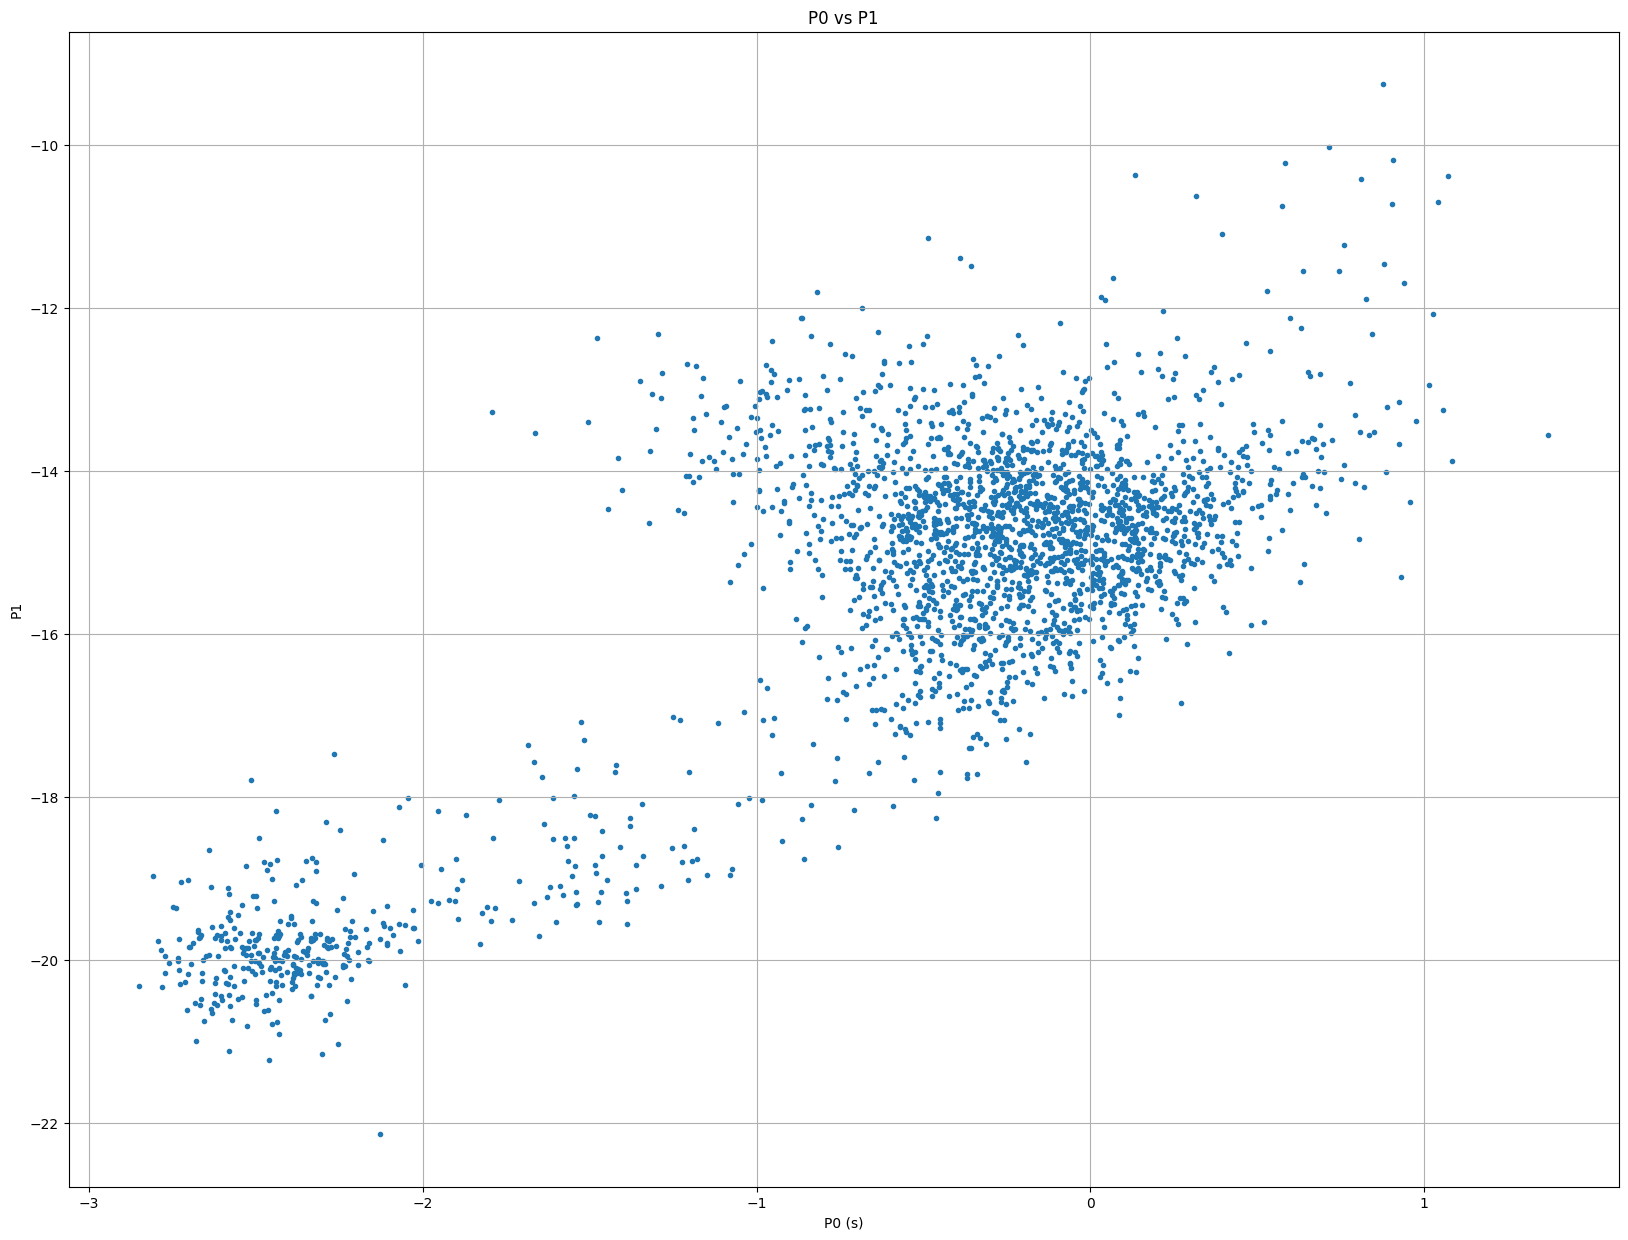

In [29]:
plt.figure(figsize=(20, 15))
plt.scatter(np.log10(new_data['P0']),np.log10(new_data['P1']),marker='.')
plt.title('P0 vs P1')
plt.xlabel('P0 (s)')
plt.ylabel('P1')
plt.grid(True)
plt.show()

In [12]:
# Droping rows containing null values for P0 and P1
filtered_data=new_data.dropna(subset=['P0','P1'])

# filtering out the non positive P1 values
filtered_data = filtered_data[(filtered_data['P1'] > 0)]

             P0        P1        F0        F1        DM        RM       W50  \
P0     1.000000  0.167523 -0.235908  0.042340  0.034207 -0.094847  0.399848   
P1     0.167523  1.000000 -0.013002 -0.025771  0.129207 -0.321678  0.025898   
F0    -0.235908 -0.013002  1.000000  0.012338 -0.240657  0.004968 -0.164517   
F1     0.042340 -0.025771  0.012338  1.000000 -0.029995  0.001032  0.023011   
DM     0.034207  0.129207 -0.240657 -0.029995  1.000000 -0.153898  0.217807   
RM    -0.094847 -0.321678  0.004968  0.001032 -0.153898  1.000000  0.153800   
W50    0.399848  0.025898 -0.164517  0.023011  0.217807  0.153800  1.000000   
S1400 -0.026052  0.000707 -0.011725 -0.034287 -0.038239 -0.016159 -0.017935   
DIST   0.038143  0.031768 -0.127807 -0.115697  0.265747 -0.007547  0.079839   
AGE   -0.034781 -0.001950  0.082455  0.004377 -0.026857  0.003616 -0.025753   

          S1400      DIST       AGE  
P0    -0.026052  0.038143 -0.034781  
P1     0.000707  0.031768 -0.001950  
F0    -0.011725 

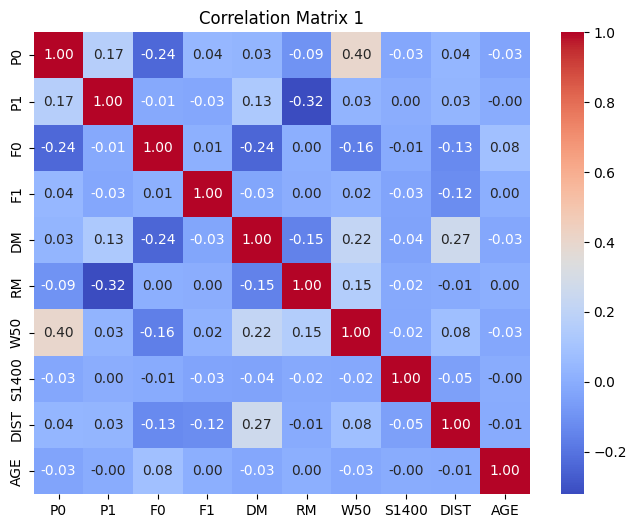

In [13]:
# selecting features for checking correlation after removing null and non positive values
data_cor_1 = filtered_data[[ 'P0', 'P1','F0', 'F1','DM', 'RM', 'W50', 'S1400', 'DIST', 'AGE']]


corr_matrix_1= data_cor_1.corr()

# print the correlation matrix
print(corr_matrix_1)

# Ploting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix 1')
plt.show()

In [16]:


# Applying log transformation on P1 and P0 into new respective columns
filtered_data['log_P0'] =np.log10(filtered_data['P0'])
filtered_data['log_P1'] =np.log10(filtered_data['P1'])

# reseting index
filtered_data = filtered_data.reset_index(drop=True)

filtered_data

,NAME,PSRJ,P0,P1,F0,F1,DM,RM,W50,S1400,BINARY,DIST,AGE,log_P0,log_P1
0,J0002+6216,J0002+6216,0.115364,5.970000e-15,8.668248,-4.484000e-13,218.60,NaN,NaN,0.02,NaN,6.357,3.060000e+05,-0.937930,-14.224026
1,J0006+1834,J0006+1834,0.693748,2.100000e-15,1.441446,-4.357000e-15,11.40,-20.00,82.0,NaN,NaN,0.860,5.240000e+06,-0.158798,-14.677781
2,J0007+7303,J0007+7303,0.315873,3.600000e-13,3.165827,-3.612000e-12,NaN,NaN,NaN,NaN,NaN,1.400,1.390000e+04,-0.500487,-12.443697
3,J0012+5431,J0012+5431,3.025301,1.280000e-16,0.330546,-1.400000e-17,131.30,NaN,NaN,NaN,NaN,5.425,3.740000e+08,0.480769,-15.892790
4,B0011+47,J0014+4746,1.240699,5.640000e-16,0.805997,-3.667000e-16,30.41,-15.56,88.7,3.00,NaN,1.776,3.480000e+07,0.093666,-15.248721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,J2351+8533,J2351+8533,1.011727,8.800000e-16,0.988409,-8.600000e-16,38.20,NaN,18.0,NaN,NaN,2.593,1.820000e+07,0.005063,-15.055517
2604,B2351+61,J2354+6155,0.944784,1.630000e-14,1.058443,-1.822000e-14,94.66,-75.90,10.4,5.00,NaN,2.400,9.200000e+05,-0.024667,-13.787812
2605,J2355+0051,J2355+0051,0.003719,3.220000e-21,268.890043,-2.330000e-16,11.15,-0.10,NaN,0.16,ELL1,0.958,1.830000e+10,-2.429574,-20.492144
2606,J2355+1523,J2355+1523,1.094396,4.190000e-16,0.913746,-3.500000e-16,26.00,NaN,NaN,NaN,NaN,3.444,4.140000e+07,0.039174,-15.377786


# **K**-**MEANS** **CLUSTERING**

In [19]:
#selected features for unsupervised learning
X =filtered_data[['log_P0','log_P1']]

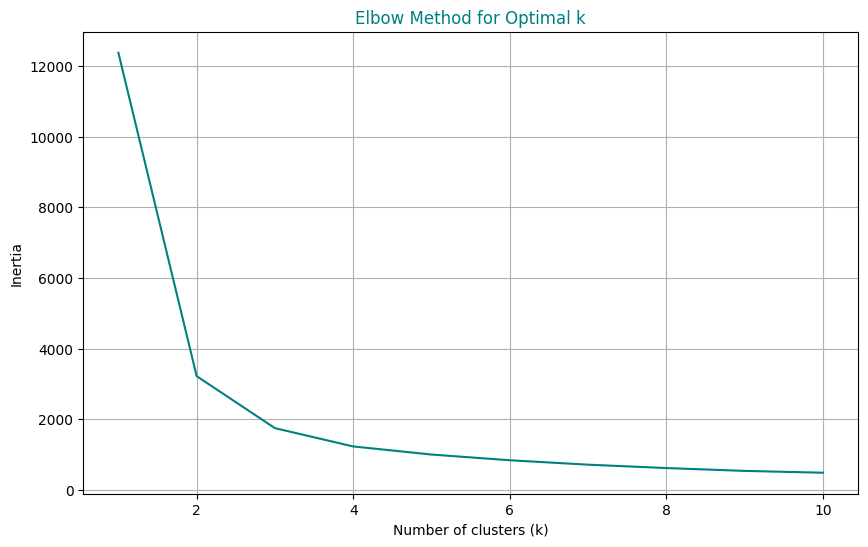

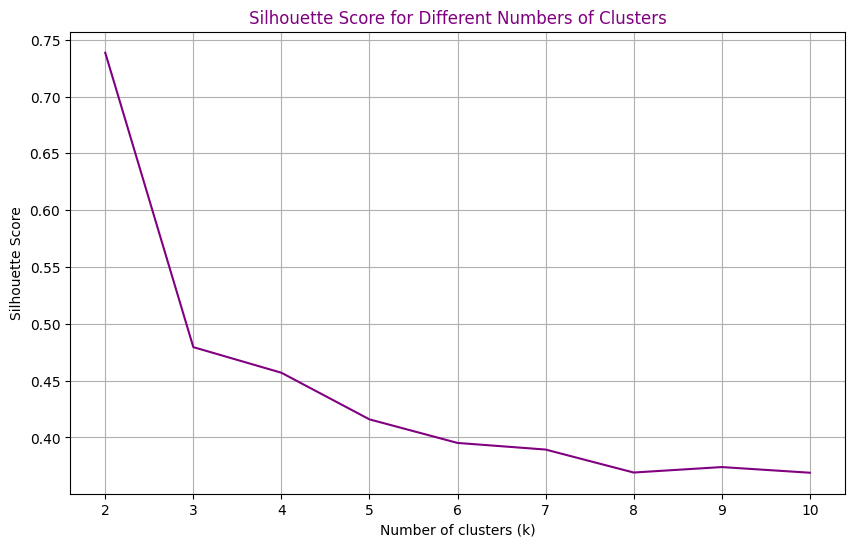

In [40]:
#looking for optimal K values by using the Elbow method and Silhouette scores

K = range(1, 11)
inertia = []
silhouette_scores = []

#Elbow method
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, color='teal')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k', color='teal')
plt.grid(True)
plt.show()


#silhouette score
for k in K[1:]:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X)
  silhouette_scores.append(silhouette_score(X,labels))


# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, label='Silhouette Score', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters', color='purple')
plt.grid(True)

plt.show()

In [42]:
#finding optimal number of clusters from the silhouette score

optimal_k = K[np.argmax(silhouette_scores) + 1]
print(f"Optimal number of clusters from silhouette score: {optimal_k}")


Optimal number of clusters from silhouette score: 2


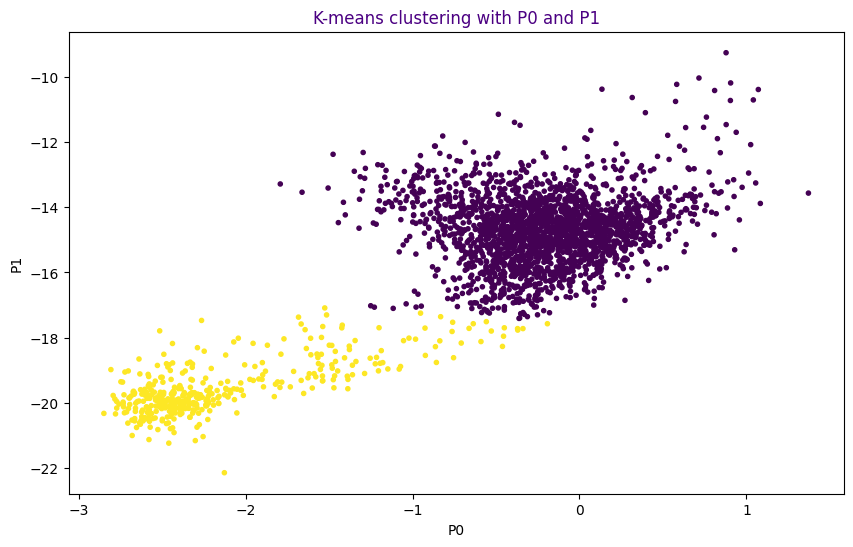

In [52]:
#applying K means with 2 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state = 42)
filtered_data['Cluster'] = kmeans.fit_predict(X)

#plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(filtered_data['log_P0'], filtered_data['log_P1'], c=filtered_data['Cluster'], marker='.')
plt.xlabel('P0')
plt.ylabel('P1')
plt.title('K-means clustering with P0 and P1',color='indigo')
plt.show()